# Cross Industry Standard Process for Data Mining

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import re
import gensim
from gensim.models import Word2Vec
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

## 1. Data Understanding

In [3]:
data = pd.read_csv("./all_data.csv")
print ('Banyak data =', len(data))
data.head()

Banyak data = 21559


,book_title,Book_series,book_series_url,book_image,book_image_url,book_rating,book_author,author_url,genre,reviewer_name,reviewer_url,reviewer_image,reviewer_image_url,review,ID
0,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),https://www.goodreads.com/series/104014-a-cour...,https://images.gr-assets.com/books/1485528243l...,https://www.goodreads.com/book/photo/23766634-...,4.51,Sarah J. Maas,https://www.goodreads.com/author/show/3433047....,"Fantasy, Romance, Young Adult, New Adult",emma,https://www.goodreads.com/user/show/32879029-emma,https://images.gr-assets.com/users/1520568130p...,https://www.goodreads.com/user/show/32879029-emma,202.\nThat’s the number of times that the word...,1
1,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),https://www.goodreads.com/series/104014-a-cour...,https://images.gr-assets.com/books/1485528243l...,https://www.goodreads.com/book/photo/23766634-...,4.51,Sarah J. Maas,https://www.goodreads.com/author/show/3433047....,"Fantasy, Romance, Young Adult, New Adult",Em (RunawayWithDreamthieves),https://www.goodreads.com/user/show/42130592-e...,https://images.gr-assets.com/users/1538507799p...,https://www.goodreads.com/user/show/42130592-e...,I need a black silk robe and a balcony to wear...,2
2,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),https://www.goodreads.com/series/104014-a-cour...,https://images.gr-assets.com/books/1485528243l...,https://www.goodreads.com/book/photo/23766634-...,4.51,Sarah J. Maas,https://www.goodreads.com/author/show/3433047....,"Fantasy, Romance, Young Adult, New Adult",Cait • A Page with a View,https://www.goodreads.com/user/show/47412532-c...,https://images.gr-assets.com/users/1523134490p...,https://www.goodreads.com/user/show/47412532-c...,THIS BOOK TOTALLY WRECKED ME. In the best poss...,3
3,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),https://www.goodreads.com/series/104014-a-cour...,https://images.gr-assets.com/books/1485528243l...,https://www.goodreads.com/book/photo/23766634-...,4.51,Sarah J. Maas,https://www.goodreads.com/author/show/3433047....,"Fantasy, Romance, Young Adult, New Adult",Natalie Monroe,https://www.goodreads.com/user/show/6688207-na...,https://images.gr-assets.com/users/1339730817p...,https://www.goodreads.com/user/show/6688207-na...,"3.75 stars\n""Rhys stepped off the stairs and t...",4
4,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),https://www.goodreads.com/series/104014-a-cour...,https://images.gr-assets.com/books/1485528243l...,https://www.goodreads.com/book/photo/23766634-...,4.51,Sarah J. Maas,https://www.goodreads.com/author/show/3433047....,"Fantasy, Romance, Young Adult, New Adult",Emily May,https://www.goodreads.com/user/show/4622890-em...,https://images.gr-assets.com/users/1528390751p...,https://www.goodreads.com/user/show/4622890-em...,I wish so much that I could tell you I loved t...,5


#### Check Null Value

In [4]:
data.isnull().sum()

book_title                0
Book_series           12779
book_series_url       12779
book_image                2
book_image_url            2
book_rating               0
book_author               0
author_url                0
genre                   121
reviewer_name            25
reviewer_url             25
reviewer_image           25
reviewer_image_url       25
review                  742
ID                        0
dtype: int64

In [5]:
data['Book_series'] = data['Book_series'].fillna(data['Book_series'].mode().iloc[0])
data['book_series_url'] = data['book_series_url'].fillna(data['book_series_url'].mode().iloc[0])
data['book_image'] = data['book_image'].fillna(data['book_image'].mode().iloc[0])
data['book_image_url'] = data['book_image_url'].fillna(data['book_image_url'].mode().iloc[0])
data['genre'] = data['genre'].fillna(data['genre'].mode().iloc[0])
data['reviewer_name'] = data['reviewer_name'].fillna(data['reviewer_name'].mode().iloc[0])
data['reviewer_url'] = data['reviewer_url'].fillna(data['reviewer_url'].mode().iloc[0])
data['reviewer_image'] = data['reviewer_image'].fillna(data['reviewer_image'].mode().iloc[0])
data['reviewer_image_url'] = data['reviewer_image_url'].fillna(data['reviewer_image_url'].mode().iloc[0])
data['review'] = data['review'].fillna(data['review'].mode().iloc[0])

In [6]:
data.isnull().sum()

book_title            0
Book_series           0
book_series_url       0
book_image            0
book_image_url        0
book_rating           0
book_author           0
author_url            0
genre                 0
reviewer_name         0
reviewer_url          0
reviewer_image        0
reviewer_image_url    0
review                0
ID                    0
dtype: int64

#### Check Duplicate Value

In [7]:
data.duplicated().sum()

0

In [8]:
data['book_title'].drop_duplicates(keep=False,inplace=True)
data.head()

,book_title,Book_series,book_series_url,book_image,book_image_url,book_rating,book_author,author_url,genre,reviewer_name,reviewer_url,reviewer_image,reviewer_image_url,review,ID
0,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),https://www.goodreads.com/series/104014-a-cour...,https://images.gr-assets.com/books/1485528243l...,https://www.goodreads.com/book/photo/23766634-...,4.51,Sarah J. Maas,https://www.goodreads.com/author/show/3433047....,"Fantasy, Romance, Young Adult, New Adult",emma,https://www.goodreads.com/user/show/32879029-emma,https://images.gr-assets.com/users/1520568130p...,https://www.goodreads.com/user/show/32879029-emma,202.\nThat’s the number of times that the word...,1
1,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),https://www.goodreads.com/series/104014-a-cour...,https://images.gr-assets.com/books/1485528243l...,https://www.goodreads.com/book/photo/23766634-...,4.51,Sarah J. Maas,https://www.goodreads.com/author/show/3433047....,"Fantasy, Romance, Young Adult, New Adult",Em (RunawayWithDreamthieves),https://www.goodreads.com/user/show/42130592-e...,https://images.gr-assets.com/users/1538507799p...,https://www.goodreads.com/user/show/42130592-e...,I need a black silk robe and a balcony to wear...,2
2,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),https://www.goodreads.com/series/104014-a-cour...,https://images.gr-assets.com/books/1485528243l...,https://www.goodreads.com/book/photo/23766634-...,4.51,Sarah J. Maas,https://www.goodreads.com/author/show/3433047....,"Fantasy, Romance, Young Adult, New Adult",Cait • A Page with a View,https://www.goodreads.com/user/show/47412532-c...,https://images.gr-assets.com/users/1523134490p...,https://www.goodreads.com/user/show/47412532-c...,THIS BOOK TOTALLY WRECKED ME. In the best poss...,3
3,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),https://www.goodreads.com/series/104014-a-cour...,https://images.gr-assets.com/books/1485528243l...,https://www.goodreads.com/book/photo/23766634-...,4.51,Sarah J. Maas,https://www.goodreads.com/author/show/3433047....,"Fantasy, Romance, Young Adult, New Adult",Natalie Monroe,https://www.goodreads.com/user/show/6688207-na...,https://images.gr-assets.com/users/1339730817p...,https://www.goodreads.com/user/show/6688207-na...,"3.75 stars\n""Rhys stepped off the stairs and t...",4
4,A Court of Wings and Ruin,(A Court of Thorns and Roses #3),https://www.goodreads.com/series/104014-a-cour...,https://images.gr-assets.com/books/1485528243l...,https://www.goodreads.com/book/photo/23766634-...,4.51,Sarah J. Maas,https://www.goodreads.com/author/show/3433047....,"Fantasy, Romance, Young Adult, New Adult",Emily May,https://www.goodreads.com/user/show/4622890-em...,https://images.gr-assets.com/users/1528390751p...,https://www.goodreads.com/user/show/4622890-em...,I wish so much that I could tell you I loved t...,5


# 2. Business Understanding

1. Bagaimana rata-rata rating buku dalam kategori genre tertentu?

In [9]:
byrating = data.groupby('genre')
byrating['book_rating'].mean()

genre
Adult Fiction                                                                                              4.040
Adult Fiction, Erotica, Bdsm, Dark, Romance, Contemporary, Did Not Finish                                  3.990
Adult Fiction, Erotica, Romance, Bdsm, Contemporary                                                        3.610
Adult Fiction, Erotica, War, Military Fiction                                                              3.830
Anthologies, Adult Fiction, Erotica, Romance, Novella                                                      4.060
                                                                                                           ...  
Young Adult, Science Fiction, Dystopia, Science Fiction, Horror, Zombies, Apocalyptic, Post Apocalyptic    3.960
Young Adult, Science Fiction, Fantasy                                                                      4.075
Young Adult, Science Fiction, Fantasy, Dystopia                                           

2. Bagaimana rating buku yang ditulis dari author? 

In [10]:
byratingsauthor = data.groupby('book_author')
byratingsauthor['book_rating'].mean()

book_author
A.L. Jackson            4.390000
Abbi Glines             3.853729
Abby Stern              3.320000
Adam Alter              3.820000
Adam M. Grant           3.890000
                          ...   
William Kent Krueger    3.990000
Willow Winters          3.880000
Zachary Mason           3.680000
Zara Ramm               4.440000
村上 春樹                   4.080000
Name: book_rating, Length: 646, dtype: float64

## 3. Data Preparation

In [11]:
data.shape

(21559, 15)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21559 entries, 0 to 21558
Data columns (total 15 columns):
book_title            21559 non-null object
Book_series           21559 non-null object
book_series_url       21559 non-null object
book_image            21559 non-null object
book_image_url        21559 non-null object
book_rating           21559 non-null float64
book_author           21559 non-null object
author_url            21559 non-null object
genre                 21559 non-null object
reviewer_name         21559 non-null object
reviewer_url          21559 non-null object
reviewer_image        21559 non-null object
reviewer_image_url    21559 non-null object
review                21559 non-null object
ID                    21559 non-null int64
dtypes: float64(1), int64(1), object(13)
memory usage: 2.3+ MB


In [13]:
data['review'].head()

0    202.\nThat’s the number of times that the word...
1    I need a black silk robe and a balcony to wear...
2    THIS BOOK TOTALLY WRECKED ME. In the best poss...
3    3.75 stars\n"Rhys stepped off the stairs and t...
4    I wish so much that I could tell you I loved t...
Name: review, dtype: object

### Data Preprocessing

#### Remove Punctuation

In [14]:
data["book_rating"]= data["book_rating"].astype(str) 

In [15]:
data['review'] = data['review'].replace('[^a-zA-Z0-9 ]', ' ', regex=True)

In [16]:
data = data[['book_title', 'review', 'book_rating','ID']]
data = data[pd.notnull(data['review'])]
data.head()

,book_title,review,book_rating,ID
0,A Court of Wings and Ruin,202 That s the number of times that the word ...,4.51,1
1,A Court of Wings and Ruin,I need a black silk robe and a balcony to wear...,4.51,2
2,A Court of Wings and Ruin,THIS BOOK TOTALLY WRECKED ME In the best poss...,4.51,3
3,A Court of Wings and Ruin,3 75 stars Rhys stepped off the stairs and to...,4.51,4
4,A Court of Wings and Ruin,I wish so much that I could tell you I loved t...,4.51,5


#### Case Folding

In [17]:
data['book_title'] = data['book_title'].str.lower()
data['review'] = data['review'].str.lower()

data.head()

,book_title,review,book_rating,ID
0,a court of wings and ruin,202 that s the number of times that the word ...,4.51,1
1,a court of wings and ruin,i need a black silk robe and a balcony to wear...,4.51,2
2,a court of wings and ruin,this book totally wrecked me in the best poss...,4.51,3
3,a court of wings and ruin,3 75 stars rhys stepped off the stairs and to...,4.51,4
4,a court of wings and ruin,i wish so much that i could tell you i loved t...,4.51,5


#### Stopwords Removing

In [18]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [19]:
cachedStopWords = set(stopwords.words("english"))
for i in range (len(data)):
    meaningful = data['review'].iloc[i]
    meaningful = " ".join([word for word in meaningful.split() if word not in cachedStopWords])
    data['review'].iloc[i]=meaningful
print ('Data trainstop words removing... ')
data.head()

Data trainstop words removing... 


,book_title,review,book_rating,ID
0,a court of wings and ruin,202 number times word mate hellish forms used ...,4.51,1
1,a court of wings and ruin,need black silk robe balcony wear gonna drag a...,4.51,2
2,a court of wings and ruin,book totally wrecked best possible way thrille...,4.51,3
3,a court of wings and ruin,3 75 stars rhys stepped stairs took hand night...,4.51,4
4,a court of wings and ruin,wish much could tell loved book thinking court...,4.51,5


In [20]:
data.to_csv("dfReview.csv")

In [21]:
data = pd.read_csv("dfReview.csv")

## 4. Training Models

In [22]:
data.dtypes

Unnamed: 0       int64
book_title      object
review          object
book_rating    float64
ID               int64
dtype: object

In [23]:
numerical_vars = ['book_rating','ID']

<Figure size 720x504 with 0 Axes>

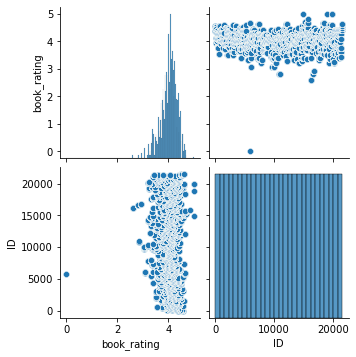

In [24]:
plt.figure(figsize=(10, 7))
_ = sns.pairplot(data=data[numerical_vars], kind='scatter')
plt.show()

In [25]:
train, test = train_test_split(data, test_size = 0.2, random_state = 0)

In [26]:
print("Jumlah data: {0}".format(data.shape))
print("Jumlah data train: {0}".format(train.shape))
print("Jumlah data test: {0}".format(test.shape))

Jumlah data: (21559, 5)
Jumlah data train: (17247, 5)
Jumlah data test: (4312, 5)


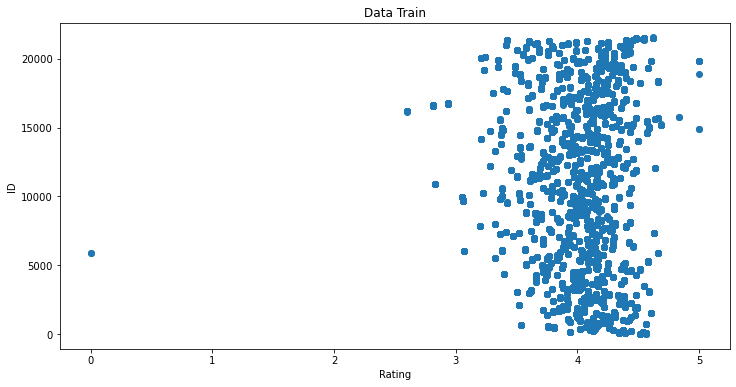

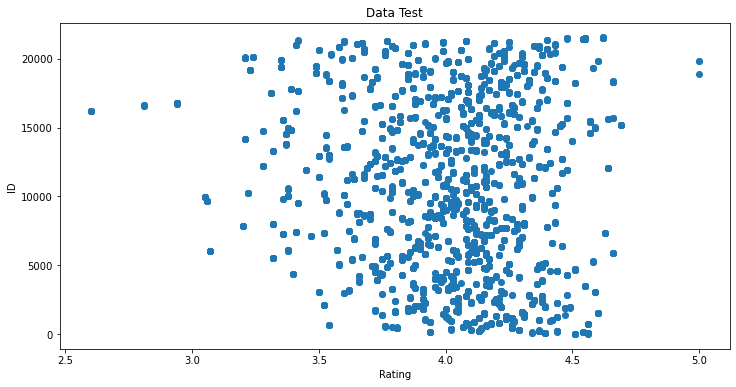

In [27]:
data_train = train[["ID", "book_rating"]]
data_test = test[["ID", "book_rating"]]

#Visualise data points
plt.figure(figsize=(12,6))
plt.title("Data Train")
plt.scatter(data_train["book_rating"], data_train["ID"])
plt.xlabel('Rating')
plt.ylabel('ID')
plt.show()

plt.figure(figsize=(12,6))
plt.title("Data Test")
plt.scatter(data_test["book_rating"], data_test["ID"])
plt.xlabel('Rating')
plt.ylabel('ID')
plt.show()

In [28]:
train = train.set_index('book_title')

In [29]:
X_train = train.iloc[:200, [0, 2]]
X_train

,Unnamed: 0,book_rating
book_title,,
wives of war,20663,4.06
legion,14559,4.10
carve the mark,548,3.76
at attention,9569,4.02
the hot one,6484,3.94
...,...,...
the silent companions,11870,3.97
behind her eyes,1377,3.75
hold back the stars,14449,3.53


In [30]:
#standardizing the data
sltd_data = X_train
scaler = StandardScaler()
data_scaled = scaler.fit_transform(sltd_data)

#statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1
count,2.000000e+02,2.000000e+02
mean,-7.938095e-17,-1.541545e-15
std,1.002509e+00,1.002509e+00
min,-1.749084e+00,-3.844041e+00
25%,-7.845532e-01,-5.604431e-01
50%,4.725307e-02,1.409078e-01
75%,8.658033e-01,6.191016e-01
max,1.769225e+00,1.989924e+00


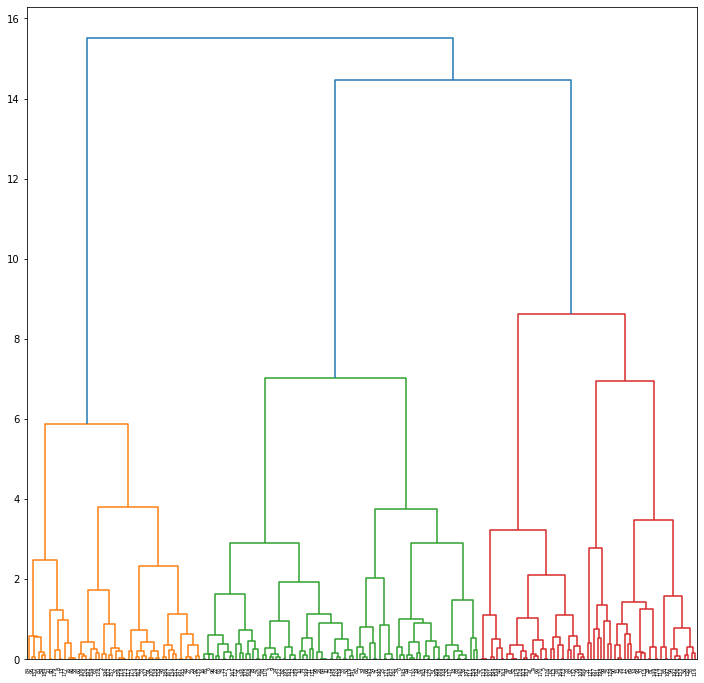

In [31]:
#create dendrogram
plt.figure(figsize=(12,12))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward', metric='euclidean', optimal_ordering=False))

#create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage='ward')

#save clusters for chart
y_hc = hc.fit_predict(data_scaled)

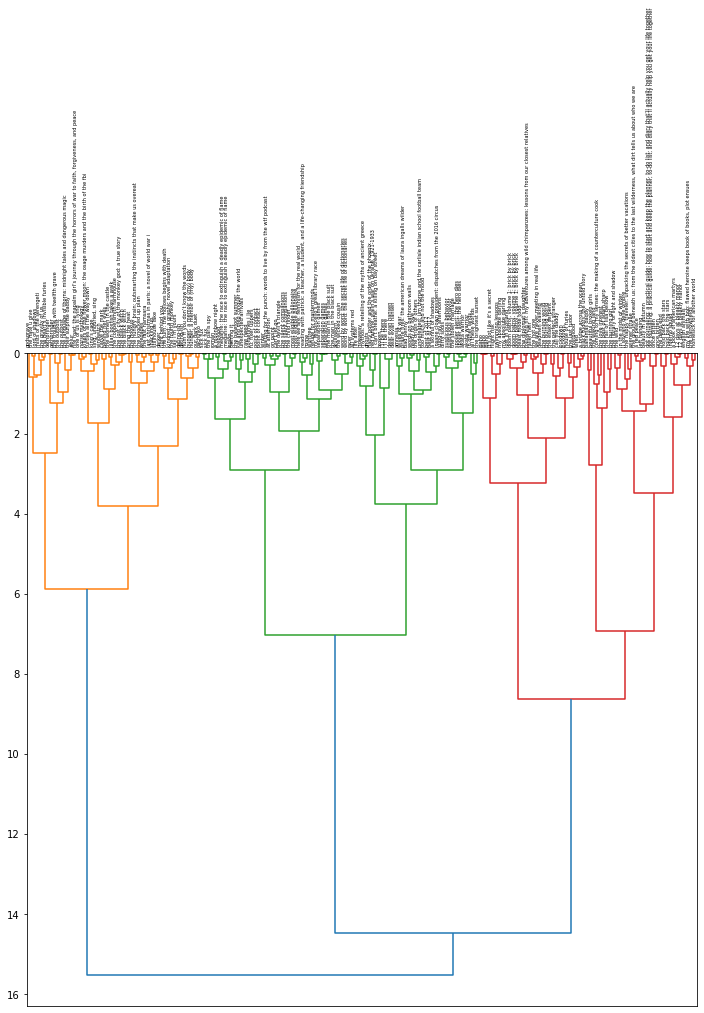

In [32]:
#create dendrogram
plt.figure(figsize=(12,12))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward', metric='euclidean', optimal_ordering=False), labels=list(X_train.index), orientation='bottom', leaf_rotation=90)

#create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage='ward')

#save clusters for chart
y_hc = hc.fit_predict(data_scaled)

In [33]:
cluster_train = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster_train.fit_predict(data_scaled)

array([2, 4, 1, 4, 3, 3, 4, 2, 1, 4, 4, 4, 4, 1, 0, 0, 4, 0, 2, 2, 1, 0,
       4, 0, 4, 2, 4, 1, 0, 1, 0, 4, 2, 4, 2, 3, 2, 1, 0, 2, 1, 3, 4, 4,
       3, 1, 1, 3, 1, 3, 4, 2, 3, 1, 2, 0, 0, 0, 1, 1, 1, 3, 4, 1, 4, 4,
       3, 3, 2, 0, 4, 2, 2, 4, 4, 4, 1, 2, 4, 3, 1, 0, 2, 0, 1, 4, 3, 2,
       2, 2, 0, 1, 1, 0, 0, 1, 4, 3, 4, 0, 1, 3, 1, 3, 3, 4, 1, 1, 2, 3,
       4, 2, 0, 3, 3, 0, 0, 1, 1, 4, 4, 0, 4, 1, 1, 2, 1, 4, 1, 0, 2, 4,
       3, 3, 1, 1, 0, 2, 1, 4, 2, 4, 1, 2, 2, 2, 4, 1, 4, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 3, 2, 4, 4, 1, 3, 3, 2, 3, 1, 4, 2, 3, 2, 4, 3, 0, 1,
       3, 1, 3, 1, 2, 0, 2, 3, 1, 1, 1, 0, 2, 4, 2, 2, 0, 4, 3, 4, 1, 0,
       0, 4], dtype=int64)

In [34]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train['ID'], X_train['book_rating'], c=cluster_train.labels_, cmap='rainbow')

KeyError: 'ID'

<Figure size 720x504 with 0 Axes>

In [35]:
test = test.set_index('book_title')

In [36]:
X_test = test.iloc[:200, [0, 2]]
X_test

,Unnamed: 0,book_rating
book_title,,
stay,1985,4.39
some kind of magic,14933,3.78
ride the storm,4777,4.15
the spanish exile,18889,3.85
"jane, unlimited",13803,3.37
...,...,...
"fly guy presents: castles (scholastic reader, level 2)",5778,4.09
alone,17338,3.63
"buy me, sir",9295,3.99


In [37]:
#standardizing the data
sltd_data2 = X_test
scaler2 = StandardScaler()
data_scaled2 = scaler2.fit_transform(sltd_data2)

#statistics of scaled data
pd.DataFrame(data_scaled2).describe()

,0,1
count,2.000000e+02,2.000000e+02
mean,-1.010303e-16,-8.454348e-16
std,1.002509e+00,1.002509e+00
min,-1.861712e+00,-3.311876e+00
25%,-8.905727e-01,-5.378024e-01
50%,1.942784e-01,9.057887e-02
75%,8.503533e-01,6.499915e-01
max,1.684361e+00,2.052355e+00


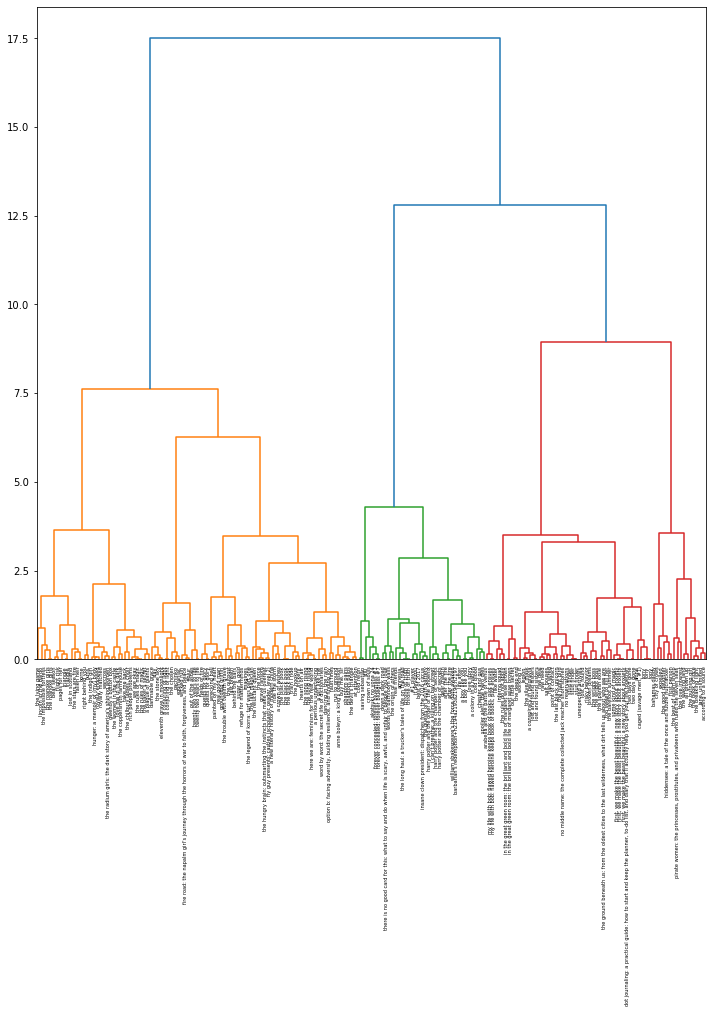

In [38]:
#create dendrogram
plt.figure(figsize=(12,12))
dendrogram = sch.dendrogram(sch.linkage(data_scaled2, method='ward', metric='euclidean', optimal_ordering=False), labels=list(X_test.index), leaf_rotation=90)

#create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage='ward')

#save clusters for chart
y_hc = hc.fit_predict(data_scaled)

In [39]:
cluster_test = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster_test.fit_predict(data_scaled2)

array([5, 2, 0, 2, 4, 3, 9, 2, 8, 0, 0, 0, 9, 7, 2, 1, 5, 8, 0, 1, 0, 2,
       1, 9, 2, 1, 5, 2, 0, 6, 2, 2, 2, 2, 0, 9, 1, 0, 5, 2, 1, 0, 0, 7,
       2, 0, 6, 4, 1, 5, 6, 7, 3, 5, 4, 1, 7, 1, 1, 0, 0, 2, 1, 2, 3, 7,
       9, 7, 1, 4, 0, 1, 8, 3, 1, 6, 6, 0, 2, 0, 1, 4, 2, 0, 4, 9, 7, 2,
       5, 3, 5, 6, 9, 0, 0, 1, 5, 5, 0, 3, 8, 7, 1, 0, 0, 1, 4, 0, 3, 2,
       1, 0, 2, 4, 2, 5, 0, 2, 3, 0, 0, 3, 2, 7, 1, 4, 3, 2, 0, 3, 2, 0,
       1, 0, 1, 2, 0, 5, 8, 2, 0, 3, 0, 0, 9, 1, 3, 0, 3, 7, 7, 2, 0, 9,
       6, 1, 0, 0, 3, 7, 1, 1, 0, 1, 7, 2, 2, 2, 3, 1, 0, 3, 2, 9, 2, 4,
       0, 2, 1, 3, 3, 0, 0, 2, 1, 0, 2, 5, 5, 8, 2, 5, 2, 7, 2, 0, 2, 0,
       1, 3], dtype=int64)

In [40]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test['book_title'], X_test['book_rating'], c=cluster_test.labels_, cmap='rainbow')

KeyError: 'book_title'

<Figure size 720x504 with 0 Axes>

In [41]:
cluster = data.groupby("book_rating")["review"].apply(list)
cluster = pd.DataFrame(cluster)
cluster.to_csv("dfReview.csv")
cluster1 = pd.read_csv("dfReview.csv")

In [42]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

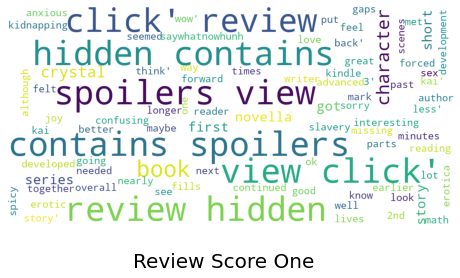

In [43]:
show_wordcloud(cluster1["review"][1], title = "Review Score One")

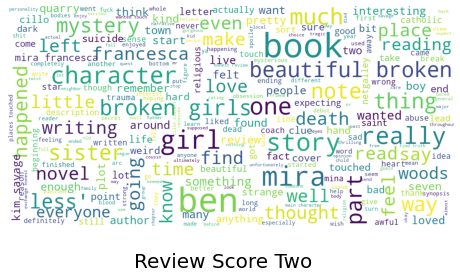

In [44]:
show_wordcloud(cluster1["review"][2], title = "Review Score Two")

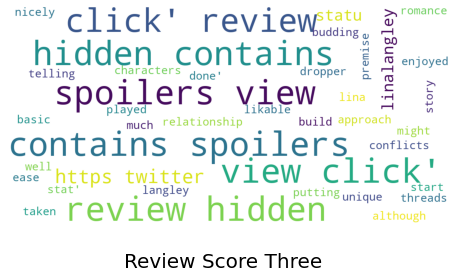

In [45]:
show_wordcloud(cluster1["review"][3], title = "Review Score Three")

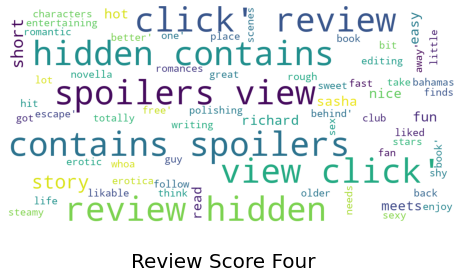

In [46]:
show_wordcloud(cluster1["review"][4], title = "Review Score Four")

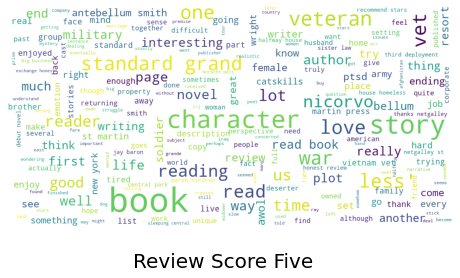

In [47]:
show_wordcloud(cluster1["review"][5], title = "Review Score Five")

## 5. Evaluation

In [48]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt 
from sklearn.metrics.cluster import silhouette_score

algs= AgglomerativeClustering(n_clusters=5)
clusters = algs.fit_predict(X_scaled)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap="Paired", s=60)
plt.title("Silhoutte Score : %.2f" % (silhouette_score(data_scaled, clusters)))
plt.figure(figsize=(17,12))
#plt.show()

NameError: name 'X_scaled' is not defined